# **Introduction to matplotlib**

In [1]:
# load the required libraries
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

# reset the matplotlib default settings, required to
# re-run the code without restarting the kernel because
# we will later change some of the settings
mpl.rcdefaults()

## Exercise: Basic Plot Types

In this exercise we use the `penguins` dataset from the `seaborn` library:
`penguins = sns.load_dataset("penguins")`

1. Load the `penguins` dataset, display the first 3 rows, investigate the .`info()`.
2. Using the stateful *plt* API: Create a scatter plot showing the relationship between `bill_length_mm` and `bill_depth_mm`.
3. Improve the plot by adding a title and axis labels.
4. Use a different color for each `species` in the scatter plot.
5. Use the object-oriented API produce the same graph as in the previous task
6. Create a histogram of the `flipper_length_mm` column with 20 bins.
7. Create a bar plot showing the average `body_mass_g` for each `species`.

### 1. Load the `penguins` dataset, display the first 3 rows, investigate the .`info()`.

In [2]:
penguins = sns.load_dataset("penguins")
print(penguins.info())
penguins.head(3)

<class 'pandas.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    str    
 1   island             344 non-null    str    
 2   bill_length_mm     342 non-null    float64
 3   bill_depth_mm      342 non-null    float64
 4   flipper_length_mm  342 non-null    float64
 5   body_mass_g        342 non-null    float64
 6   sex                333 non-null    str    
dtypes: float64(4), str(3)
memory usage: 24.9 KB
None


,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female


### 2. Using the stateful *plt* API: Create a scatter plot showing the relationship between
`bill_length_mm` and `bill_depth_mm`.

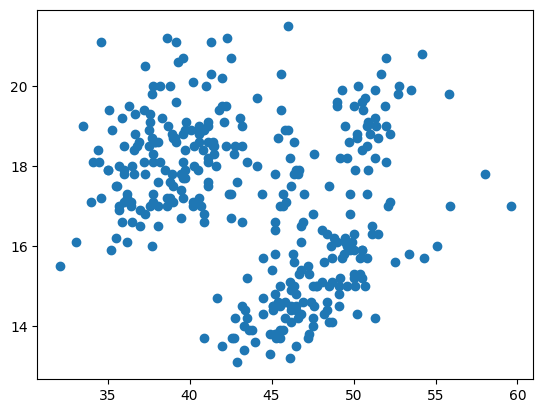

In [3]:
plt.scatter(penguins["bill_length_mm"], penguins["bill_depth_mm"])
plt.show()

### 3. Improve the plot by adding a title and axis labels.

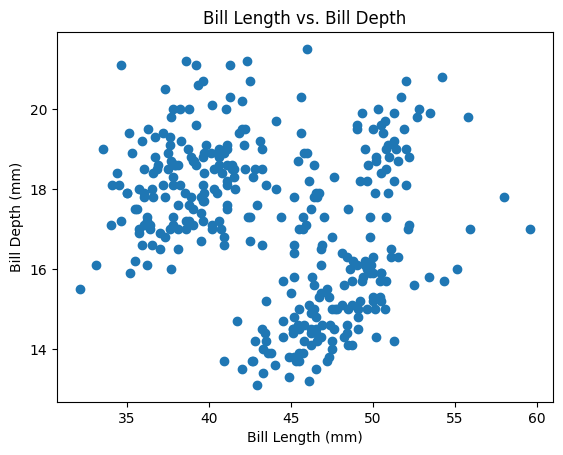

In [4]:
plt.scatter(penguins["bill_length_mm"], penguins["bill_depth_mm"])
plt.title("Bill Length vs. Bill Depth")
plt.xlabel("Bill Length (mm)")
plt.ylabel("Bill Depth (mm)")
plt.show()

### 4. Use a different color for each `species` in the scatter plot.

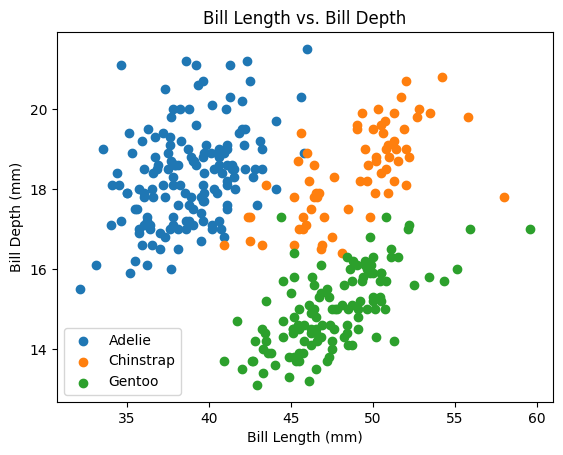

In [5]:
# get the unique species
species = penguins["species"].unique()
# create a scatter plot for each species
for specie in species:
    sub_df = penguins[penguins["species"] == specie]
    plt.scatter(sub_df["bill_length_mm"], sub_df["bill_depth_mm"], label=specie)
plt.title("Bill Length vs. Bill Depth")
plt.xlabel("Bill Length (mm)")
plt.ylabel("Bill Depth (mm)")
plt.legend()
plt.show()

### 5. Use the object-oriented API produce the same graph as in the previous task

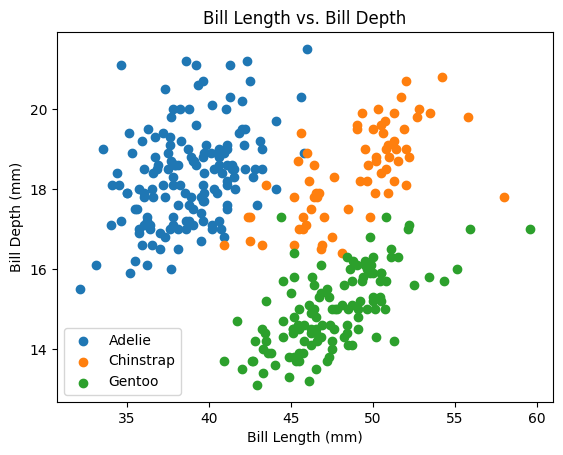

In [6]:
fig, ax = plt.subplots()
for specie in species:
    sub_df = penguins[penguins["species"] == specie]
    ax.scatter(sub_df["bill_length_mm"], sub_df["bill_depth_mm"], label=specie)
ax.set_title("Bill Length vs. Bill Depth")
ax.set_xlabel("Bill Length (mm)")
ax.set_ylabel("Bill Depth (mm)")
ax.legend()
plt.show()

### 6. Create a histogram of the `flipper_length_mm` column with
20 bins.

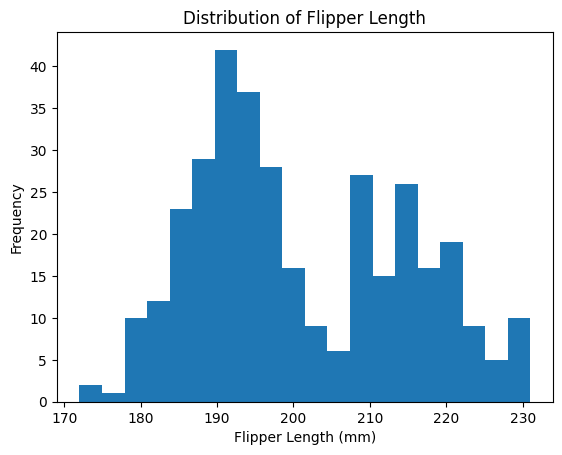

In [7]:
fig, ax = plt.subplots()
ax.hist(penguins["flipper_length_mm"], bins=20)
ax.set_title("Distribution of Flipper Length")
ax.set_xlabel("Flipper Length (mm)")
ax.set_ylabel("Frequency")
plt.show()

### 7. Create a bar plot showing the average `body_mass_g` for each `species`.

In [8]:
# Step 1: prepare aggregated data for plotting
df_plot = penguins.groupby("species")["body_mass_g"].mean().reset_index()
df_plot

,species,body_mass_g
0,Adelie,3700.662252
1,Chinstrap,3733.088235
2,Gentoo,5076.016260


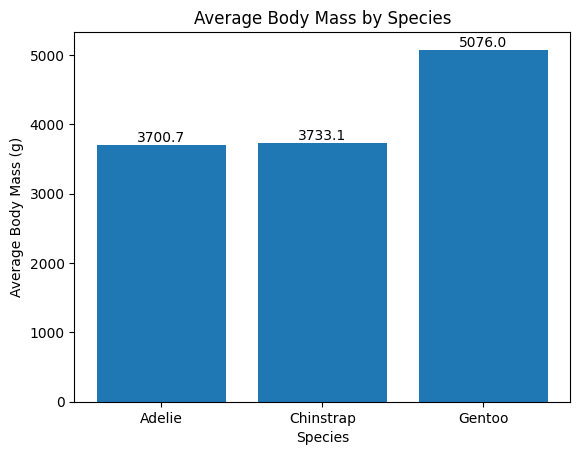

In [9]:
# Step 2: create the bar plot
fig, ax = plt.subplots()
bar_container = ax.bar(df_plot["species"], df_plot["body_mass_g"])
# adding a bar label
ax.bar_label(bar_container, fmt="%.1f")
ax.set_title("Average Body Mass by Species")
ax.set_xlabel("Species")
ax.set_ylabel("Average Body Mass (g)")
plt.show()

## Exercise: Customization of plots
We use the `penguins` dataset.
1. Re-create the scatter plot from the previous exercise using the object-oriented API, including the title and axis labels, using a different color for each species.
2. Using arguments to the plotting method:
  * change the marker style to an empty circle for all species
  * make the markers half-transparent.
  * decrease the marker size to 10.
3. Using the ax object:
  * add a grid
  * rotate the X-axis labels by 45 degrees
  * change the font size of the axis labels
  * add a vertical line at the median value of `bill_length_mm`
  * add a horizontal line at the median value of `bill_depth_mm`
  * add an annotations to both median reference lines
  * remove the top and right spines
4. Apply the `seaborn-v0_8-white` style to the plot.

In [10]:
penguins = sns.load_dataset("penguins")

### 1. Re-create the scatter plot from the previous exercise using the object-oriented API, including the title and axis labels, using a different color for each species.

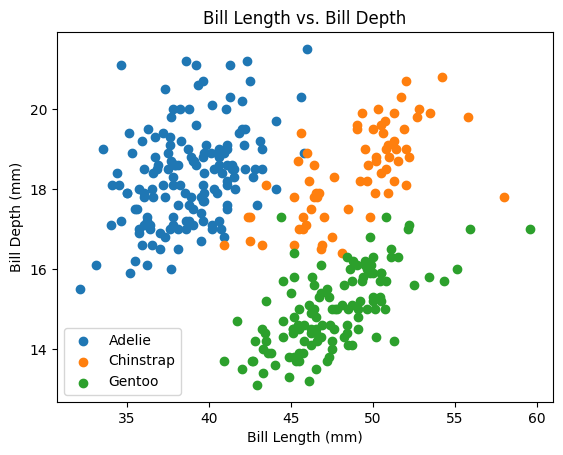

In [11]:
fig, ax = plt.subplots()
for specie in species:
    sub_df = penguins[penguins["species"] == specie]
    ax.scatter(sub_df["bill_length_mm"], sub_df["bill_depth_mm"], label=specie)
ax.set_title("Bill Length vs. Bill Depth")
ax.set_xlabel("Bill Length (mm)")
ax.set_ylabel("Bill Depth (mm)")
ax.legend()
plt.show()

### 2. Using arguments to the plotting method:
* change the marker style to an empty circle for all species
* make the markers half-transparent.
* decrease the marker size to 10.

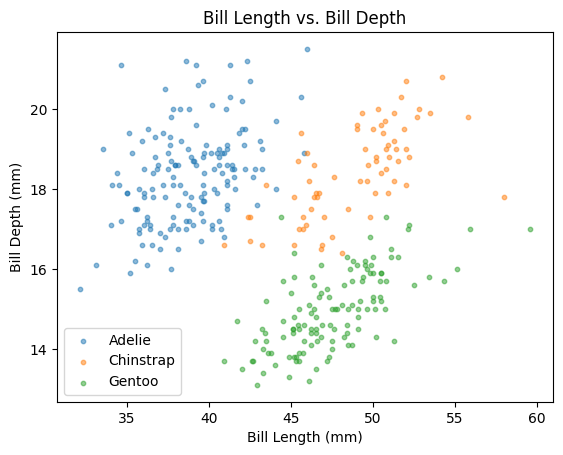

In [12]:
fig, ax = plt.subplots()
for specie in species:
    sub_df = penguins[penguins["species"] == specie]
    ax.scatter(
        sub_df["bill_length_mm"],
        sub_df["bill_depth_mm"],
        label=specie,
        marker="o",
        alpha=0.5,
        s=10,
    )
ax.set_title("Bill Length vs. Bill Depth")
ax.set_xlabel("Bill Length (mm)")
ax.set_ylabel("Bill Depth (mm)")
ax.legend()
plt.show()

### 3. Using the ax object:
* add a grid
* rotate the X-axis labels by 45 degrees
* change the font size of the axis labels
* add a vertical line at the median value of `bill_length_mm`
* add a horizontal line at the median value of `bill_depth_mm`
* add an annotations to both median reference lines
* remove the top and right spines

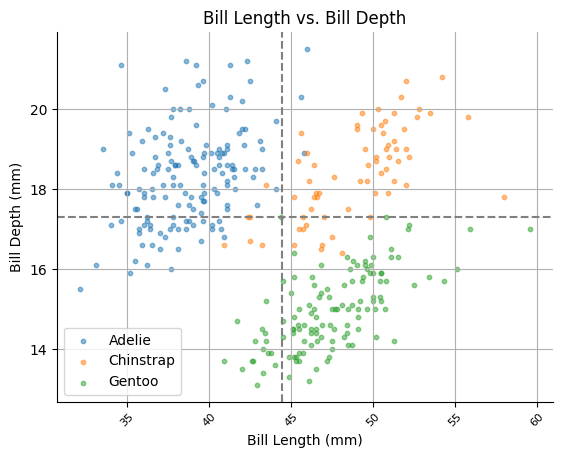

In [13]:
fig, ax = plt.subplots()
for specie in species:
    sub_df = penguins[penguins["species"] == specie]
    ax.scatter(
        sub_df["bill_length_mm"],
        sub_df["bill_depth_mm"],
        label=specie,
        marker="o",
        alpha=0.5,
        s=10,
    )
ax.set_title("Bill Length vs. Bill Depth")
ax.set_xlabel("Bill Length (mm)")
ax.set_ylabel("Bill Depth (mm)")
ax.legend()
ax.grid(visible=True)
for label in ax.get_xticklabels():
    label.set_rotation(45)
    label.set_fontsize(8)
ax.axvline(penguins["bill_length_mm"].median(), color="grey", linestyle="--")
ax.axhline(penguins["bill_depth_mm"].median(), color="grey", linestyle="--")
ax.spines[["top", "right"]].set_visible(False)
plt.show()

### 4. Apply the `seaborn-v0_8-white` style to the plot.

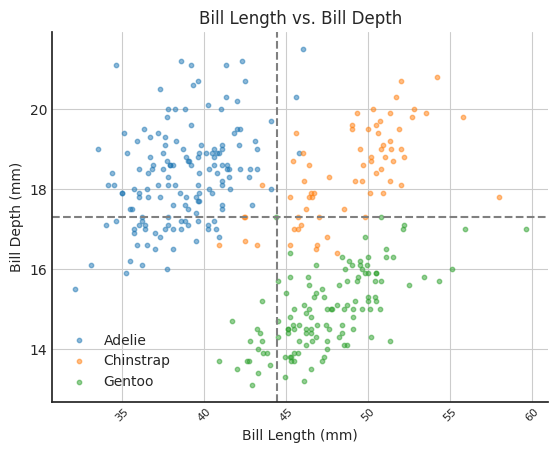

In [14]:
plt.style.use("seaborn-v0_8-white")
fig, ax = plt.subplots()
for specie in species:
    sub_df = penguins[penguins["species"] == specie]
    ax.scatter(
        sub_df["bill_length_mm"],
        sub_df["bill_depth_mm"],
        label=specie,
        marker="o",
        alpha=0.5,
        s=10,
    )
ax.set_title("Bill Length vs. Bill Depth")
ax.set_xlabel("Bill Length (mm)")
ax.set_ylabel("Bill Depth (mm)")
ax.legend()
ax.grid(visible=True)
for label in ax.get_xticklabels():
    label.set_rotation(45)
    label.set_fontsize(8)
ax.axvline(penguins["bill_length_mm"].median(), color="grey", linestyle="--")
ax.axhline(penguins["bill_depth_mm"].median(), color="grey", linestyle="--")
ax.spines[["top", "right"]].set_visible(False)
plt.show()

## Exercise: Multiple plots in a grid and saving figures
Using the `penguins` dataset, create a 3x1 grid (3 rows, 1 column) with histograms of
`bill_length_mm` for each `species`. Make sure to:
* Use different colors for each species.
* Use the histtype `stepfilled` with a black edge color.
* Add a title and axis labels to each subplot.
* Ensure the X-axis limits are uniform across all subplots.
* add reference lines at the median, and annotate with the respective group-specific value.
Finally, the figure as a PNG file with a resolution of 300 dpi.

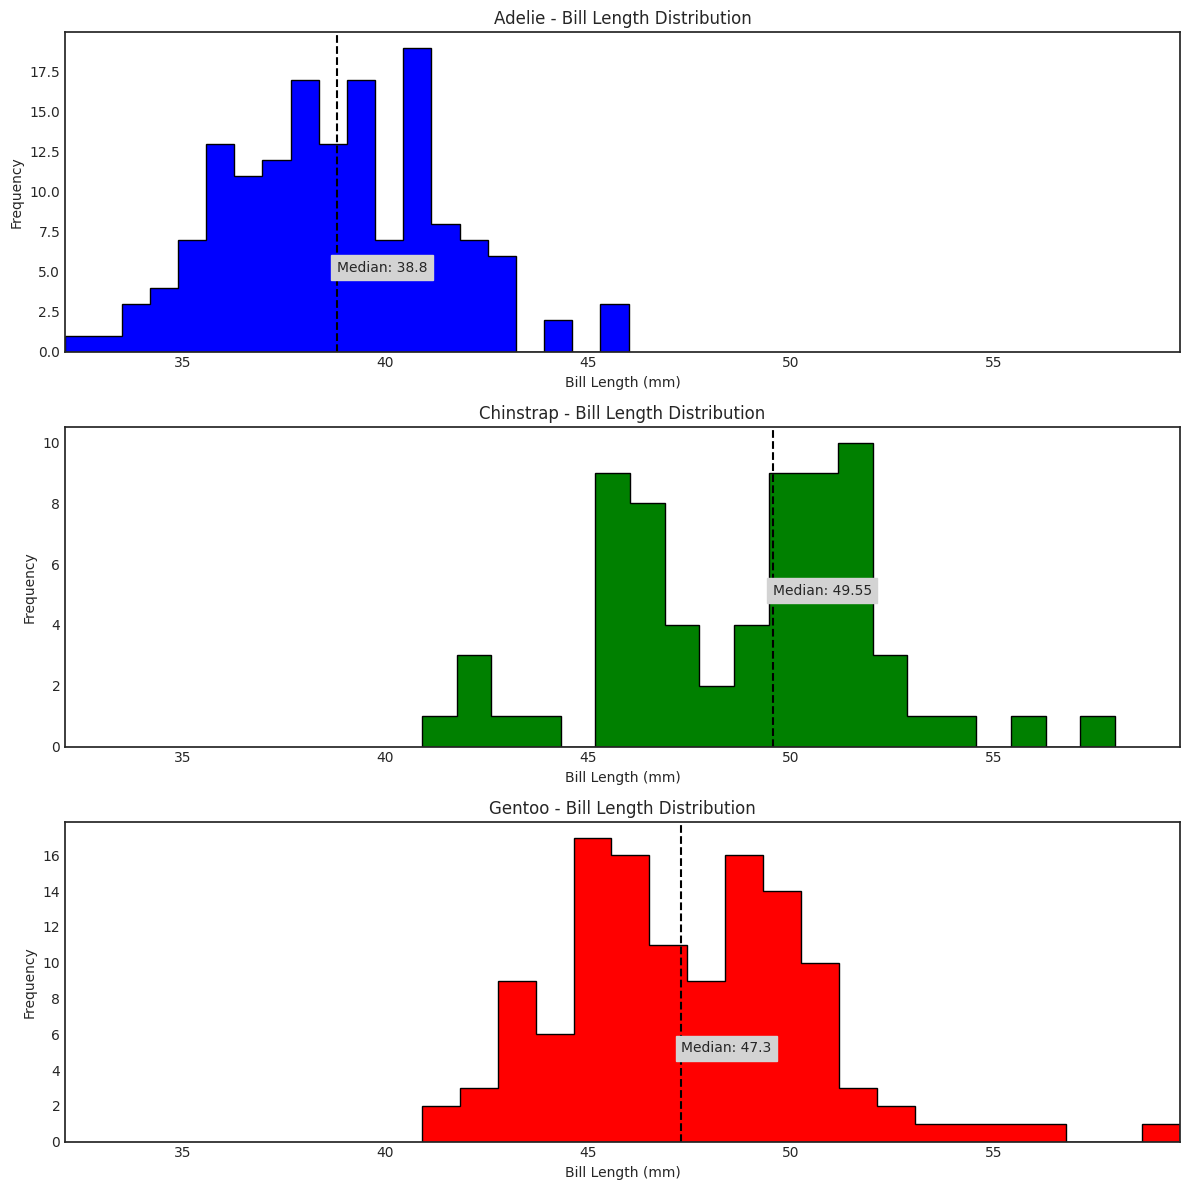

In [15]:
fig, axes = plt.subplots(3, 1, figsize=(12, 12))

# create a list of colors to use
colors = ["blue", "green", "red"]

x_limits = penguins["bill_length_mm"].min(), penguins["bill_length_mm"].max()

# iterate
for i, (key, sub_df) in enumerate(penguins.groupby("species")):
    ax = axes[i]
    ax.hist(
        sub_df["bill_length_mm"],
        bins=20,
        color=colors[i],
        histtype="stepfilled",
        edgecolor="black",
    )
    ax.set_title(f"{key} - Bill Length Distribution")
    ax.set_xlabel("Bill Length (mm)")
    ax.set_ylabel("Frequency")
    ax.set_xlim(x_limits)
    ax.axvline(sub_df["bill_length_mm"].median(), color="black", linestyle="--")
    ax.annotate(
        f"Median: {sub_df['bill_length_mm'].median()}",
        xy=(sub_df["bill_length_mm"].median(), 5),
        xytext=(sub_df["bill_length_mm"].median(), 5),
        arrowprops=dict(arrowstyle="->"),
        backgroundcolor="lightgrey",
    )

plt.tight_layout()
fig.savefig("bill_length_distribution.png", dpi=300, bbox_inches="tight")
plt.show()